# 1. Import Modules

In [1]:
import pandas as pd
import random
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_theme(style="whitegrid")
from sklearn.model_selection import train_test_split
from sklearn.metrics import (roc_curve, auc, roc_auc_score, confusion_matrix,accuracy_score,classification_report)
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import MinMaxScaler

# 2. Load and Cleaning Dataset

In [2]:
df = pd.read_csv("C:\\Users\deand\Downloads\loan_data_2007_2014.csv")

C:\Users\deand\anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3444: DtypeWarning: Columns (20) have mixed types.Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)


In [3]:
df

,Unnamed: 0,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,...,total_bal_il,il_util,open_rv_12m,open_rv_24m,max_bal_bc,all_util,total_rev_hi_lim,inq_fi,total_cu_tl,inq_last_12m
0,0,1077501,1296599,5000,5000,4975.0,36 months,10.65,162.87,B,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,1,1077430,1314167,2500,2500,2500.0,60 months,15.27,59.83,C,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2,1077175,1313524,2400,2400,2400.0,36 months,15.96,84.33,C,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,3,1076863,1277178,10000,10000,10000.0,36 months,13.49,339.31,C,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,4,1075358,1311748,3000,3000,3000.0,60 months,12.69,67.79,B,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
466280,466280,8598660,1440975,18400,18400,18400.0,60 months,14.47,432.64,C,...,NaN,NaN,NaN,NaN,NaN,NaN,29900.0,NaN,NaN,NaN
466281,466281,9684700,11536848,22000,22000,22000.0,60 months,19.97,582.50,D,...,NaN,NaN,NaN,NaN,NaN,NaN,39400.0,NaN,NaN,NaN
466282,466282,9584776,11436914,20700,20700,20700.0,60 months,16.99,514.34,D,...,NaN,NaN,NaN,NaN,NaN,NaN,13100.0,NaN,NaN,NaN
466283,466283,9604874,11457002,2000,2000,2000.0,36 months,7.90,62.59,A,...,NaN,NaN,NaN,NaN,NaN,NaN,53100.0,NaN,NaN,NaN


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 466285 entries, 0 to 466284
Data columns (total 75 columns):
 #   Column                       Non-Null Count   Dtype  
---  ------                       --------------   -----  
 0   Unnamed: 0                   466285 non-null  int64  
 1   id                           466285 non-null  int64  
 2   member_id                    466285 non-null  int64  
 3   loan_amnt                    466285 non-null  int64  
 4   funded_amnt                  466285 non-null  int64  
 5   funded_amnt_inv              466285 non-null  float64
 6   term                         466285 non-null  object 
 7   int_rate                     466285 non-null  float64
 8   installment                  466285 non-null  float64
 9   grade                        466285 non-null  object 
 10  sub_grade                    466285 non-null  object 
 11  emp_title                    438697 non-null  object 
 12  emp_length                   445277 non-null  object 
 13 

In [5]:
df.drop(columns=['Unnamed: 0'],inplace=True)

In [6]:
df.drop(['id','member_id'],axis= 1, inplace=True)

In [7]:
df.dropna(how='all',axis=1,inplace=True)

In [8]:
(df.isnull().sum()/ len(df))*100

loan_amnt                       0.000000
funded_amnt                     0.000000
funded_amnt_inv                 0.000000
term                            0.000000
int_rate                        0.000000
installment                     0.000000
grade                           0.000000
sub_grade                       0.000000
emp_title                       5.916553
emp_length                      4.505399
home_ownership                  0.000000
annual_inc                      0.000858
verification_status             0.000000
issue_d                         0.000000
loan_status                     0.000000
pymnt_plan                      0.000000
url                             0.000000
desc                           72.981546
purpose                         0.000000
title                           0.004289
zip_code                        0.000000
addr_state                      0.000000
dti                             0.000000
delinq_2yrs                     0.006219
earliest_cr_line

In [9]:
df.drop(columns=['desc','url','mths_since_last_delinq','mths_since_last_record','next_pymnt_d','mths_since_last_major_derog','tot_coll_amt','tot_cur_bal','total_rev_hi_lim'],inplace=True)

# 3. Visualizing dataset

<AxesSubplot:xlabel='installment', ylabel='loan_amnt'>

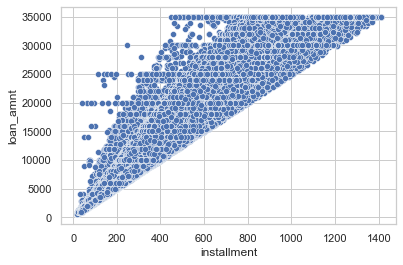

In [9]:
sns.scatterplot(x='installment',y='loan_amnt',data=df)

(array([0, 1, 2, 3, 4, 5, 6, 7, 8]),
 [Text(0, 0, 'Fully Paid'),
  Text(1, 0, 'Charged Off'),
  Text(2, 0, 'Current'),
  Text(3, 0, 'Default'),
  Text(4, 0, 'Late (31-120 days)'),
  Text(5, 0, 'In Grace Period'),
  Text(6, 0, 'Late (16-30 days)'),
  Text(7, 0, 'Does not meet the credit policy. Status:Fully Paid'),
  Text(8, 0, 'Does not meet the credit policy. Status:Charged Off')])

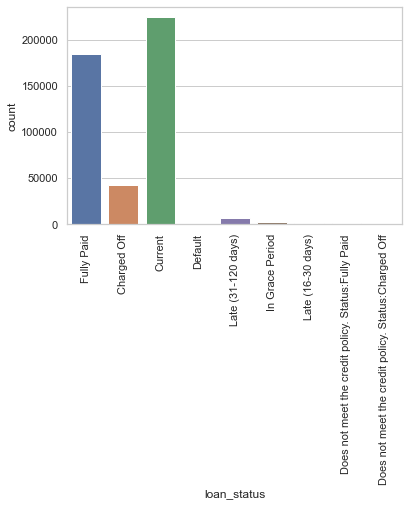

In [11]:
sns.countplot(x='loan_status',data = df)
plt.xticks(rotation=90)

C:\Users\deand\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='loan_amnt'>

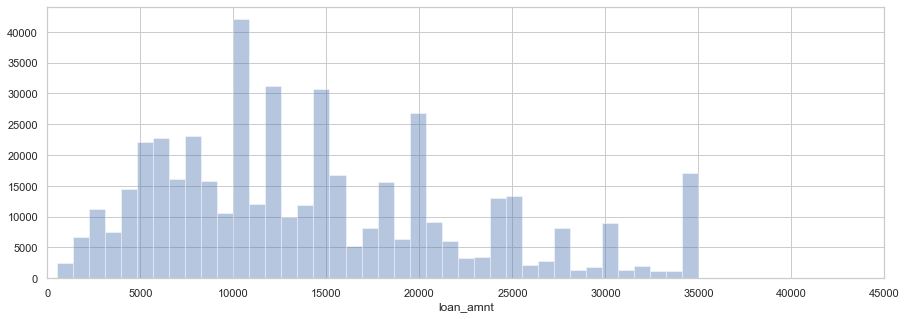

In [12]:
plt.figure(figsize=(15,5))
plt.xlim(0,45000)
sns.distplot(df['loan_amnt'],kde=False,bins=40)

{'whiskers': [<matplotlib.lines.Line2D at 0x1d99ac3ea00>,
 'caps': [<matplotlib.lines.Line2D at 0x1d99ac3efd0>,
 'boxes': [<matplotlib.lines.Line2D at 0x1d99ac3e880>],
 'medians': [<matplotlib.lines.Line2D at 0x1d99ac2d5b0>],
 'fliers': [<matplotlib.lines.Line2D at 0x1d99ac2d880>],
 'means': []}

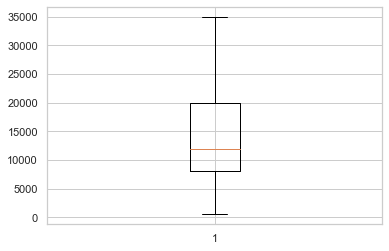

In [13]:
plt.boxplot(df['loan_amnt'])

<AxesSubplot:>

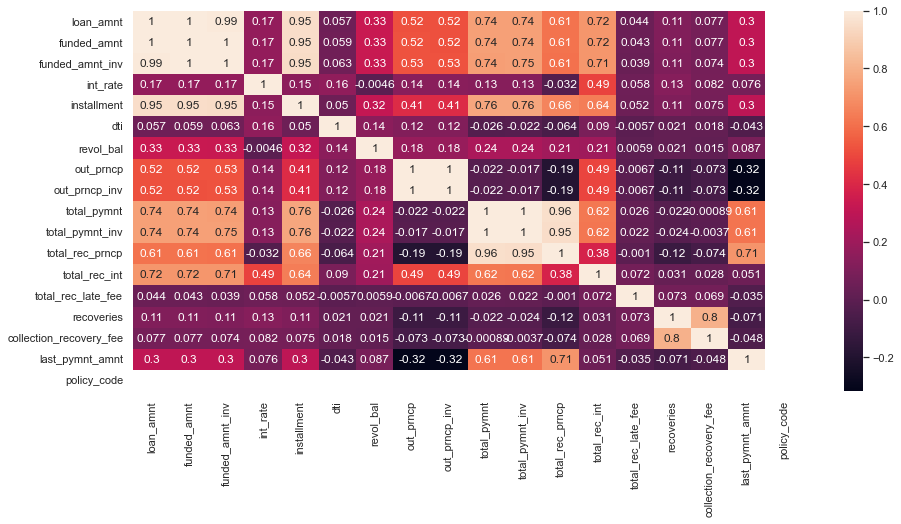

In [14]:
plt.figure(figsize=(15,7))
sns.heatmap(df.corr(),annot=True)

(array([0, 1, 2]),
 [Text(0, 0, 'Fully Paid'), Text(1, 0, 'Charged Off'), Text(2, 0, 'Current')])

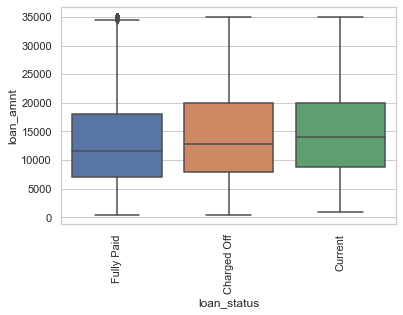

In [39]:
sns.boxplot(x='loan_status',y='loan_amnt',data=df)
plt.xticks(rotation=90)

<AxesSubplot:xlabel='grade', ylabel='count'>

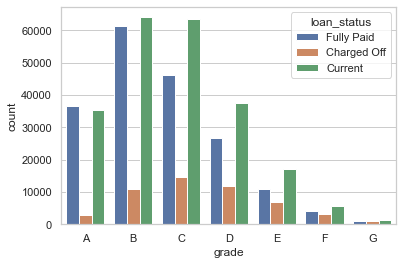

In [38]:
grade_order = sorted(df['grade'].unique())
sns.countplot(x='grade',data=df, hue='loan_status', order = grade_order)

<AxesSubplot:xlabel='sub_grade', ylabel='count'>

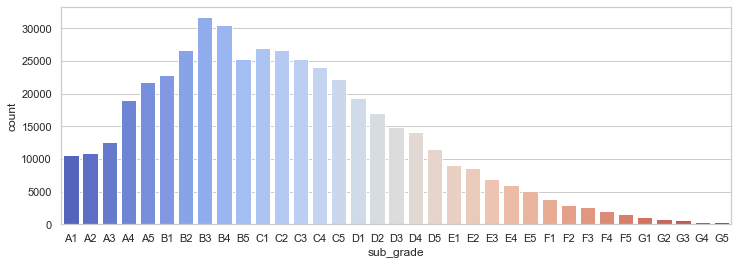

In [17]:
#let's explore the sub_grades 
plt.figure(figsize=(12,4))
subgrade_order = sorted(df['sub_grade'].unique())
sns.countplot(x='sub_grade',data=df,order = subgrade_order,palette='coolwarm')

<AxesSubplot:xlabel='sub_grade', ylabel='count'>

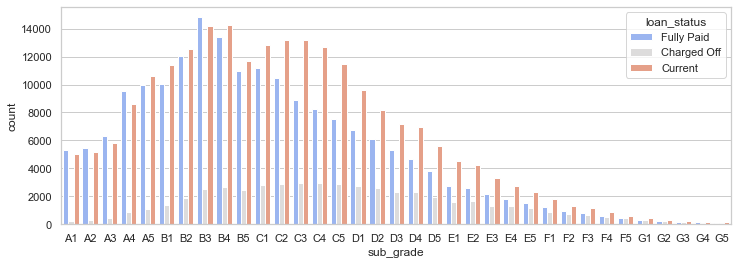

In [37]:
plt.figure(figsize=(12,4))
subgrade_order = sorted(df['sub_grade'].unique())
sns.countplot(x='sub_grade',data=df, order = subgrade_order,palette='coolwarm' ,hue='loan_status')

In [20]:
emp_length_order = [ '< 1 year',
                      '1 year',
                     '2 years',
                     '3 years',
                     '4 years',
                     '5 years',
                     '6 years',
                     '7 years',
                     '8 years',
                     '9 years',
                     '10+ years']

<AxesSubplot:xlabel='emp_length', ylabel='count'>

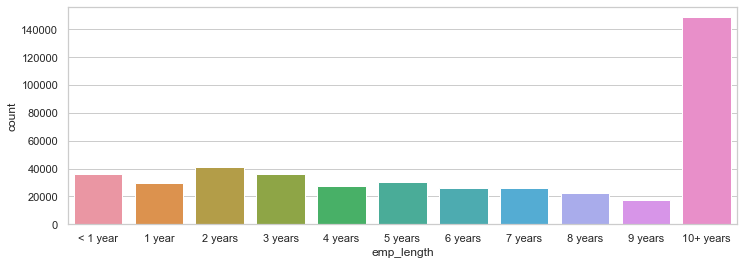

In [22]:
plt.figure(figsize=(12,4))
sns.countplot(x='emp_length',data=df,order=emp_length_order)

<AxesSubplot:xlabel='emp_length', ylabel='count'>

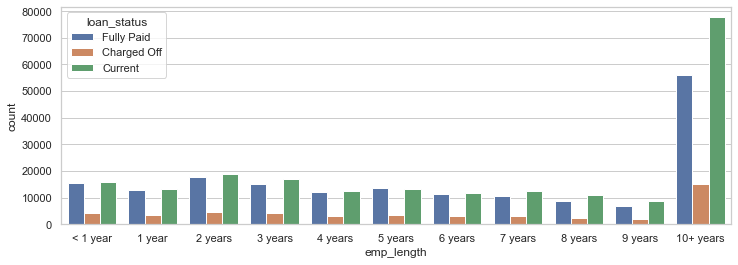

In [26]:
plt.figure(figsize=(12,4))
sns.countplot(x='emp_length',data=df,order=emp_length_order, hue = 'loan_status')

In [28]:
emp_chargedOff = df[df['loan_status']=="Charged Off"].groupby("emp_length").count()['loan_status']
emp_fullyPaid = df[df['loan_status']=="Fully Paid"].groupby("emp_length").count()['loan_status']

In [29]:
emp_lenProp = emp_chargedOff/emp_fullyPaid
print(emp_lenProp)

emp_length
1 year       0.261661
10+ years    0.269027
2 years      0.259136
3 years      0.264342
4 years      0.253775
5 years      0.260120
6 years      0.274857
7 years      0.279298
8 years      0.286930
9 years      0.293218
< 1 year     0.280650
Name: loan_status, dtype: float64


<AxesSubplot:xlabel='emp_length'>

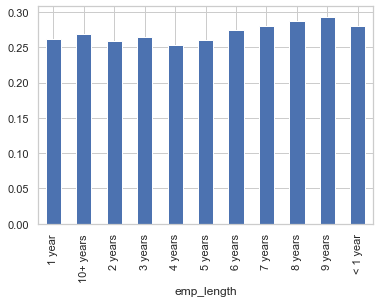

In [30]:
emp_lenProp.plot(kind='bar')

In [10]:
df = df.drop(['emp_title','emp_length'],axis=1)

In [11]:
df = df.drop(['title'],axis=1)

In [19]:
df['loan_repaid'] = df['loan_status'].map({'Fully Paid':1,'Charged Off':0,'Current':2})

<AxesSubplot:>

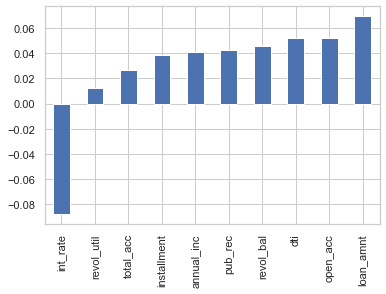

In [20]:
df.corr()['loan_repaid'].sort_values().drop('loan_repaid').plot(kind='bar')

# 4. Making columns into meaningful feature using dummies

In [12]:
df = df.filter(items=['loan_amnt','term','int_rate','installment','sub_grade','home_ownership','annual_inc','verification_status','issue_d ','loan_status','purpose','dti','earliest_cr_line','open_acc','pub_rec','revol_bal','revol_util','total_acc','initial_list_status','application_type','loan_repaid'])

In [13]:
df = df.dropna()

In [14]:
df['loan_status'].value_counts()

Current                                                224120
Fully Paid                                             184600
Charged Off                                             42428
Late (31-120 days)                                       6895
In Grace Period                                          3144
Does not meet the credit policy. Status:Fully Paid       1954
Late (16-30 days)                                        1217
Default                                                   832
Does not meet the credit policy. Status:Charged Off       755
Name: loan_status, dtype: int64

In [15]:
(df['loan_status'].value_counts()/ len(df)) * 100

Current                                                48.100098
Fully Paid                                             39.618410
Charged Off                                             9.105796
Late (31-120 days)                                      1.479788
In Grace Period                                         0.674758
Does not meet the credit policy. Status:Fully Paid      0.419363
Late (16-30 days)                                       0.261190
Default                                                 0.178562
Does not meet the credit policy. Status:Charged Off     0.162036
Name: loan_status, dtype: float64

In [16]:
df['loan_status'] = df['loan_status'].replace(['Does not meet the credit policy. Status:Fully Paid'],'Fully Paid')
df['loan_status'] = df['loan_status'].replace(['Does not meet the credit policy. Status:Charged Off','Late (31-120 days)','Late (16-30 days)','Late'],'Charged Off')

In [17]:
df = df[df.loan_status.isin(['Default','In Grace Period']) == False]

In [18]:
df['loan_status'].unique()

array(['Fully Paid', 'Charged Off', 'Current'], dtype=object)

In [21]:
df['home_ownership'].value_counts()

MORTGAGE    233905
RENT        186548
OWN          41289
OTHER          180
NONE            46
ANY              1
Name: home_ownership, dtype: int64

In [22]:
df['home_ownership'] = df['home_ownership'].replace(['NONE','ANY'],'OTHER')

In [23]:
df.select_dtypes(['object']).columns

Index(['term', 'sub_grade', 'home_ownership', 'verification_status',
       'loan_status', 'purpose', 'earliest_cr_line', 'initial_list_status',
       'application_type'],
      dtype='object')

In [24]:
df['term'] = df['term'].apply(lambda term: int(term[:3]))

In [25]:
df['term'].value_counts()

36    335226
60    126743
Name: term, dtype: int64

In [26]:
subgrade_dummies = pd.get_dummies(df['sub_grade'],drop_first=True)

In [27]:
df = pd.concat([df.drop('sub_grade',axis=1),subgrade_dummies],axis=1)

In [28]:
df.columns

Index(['loan_amnt', 'term', 'int_rate', 'installment', 'home_ownership',
       'annual_inc', 'verification_status', 'loan_status', 'purpose', 'dti',
       'earliest_cr_line', 'open_acc', 'pub_rec', 'revol_bal', 'revol_util',
       'total_acc', 'initial_list_status', 'application_type', 'loan_repaid',
       'A2', 'A3', 'A4', 'A5', 'B1', 'B2', 'B3', 'B4', 'B5', 'C1', 'C2', 'C3',
       'C4', 'C5', 'D1', 'D2', 'D3', 'D4', 'D5', 'E1', 'E2', 'E3', 'E4', 'E5',
       'F1', 'F2', 'F3', 'F4', 'F5', 'G1', 'G2', 'G3', 'G4', 'G5'],
      dtype='object')

In [29]:
dummies = pd.get_dummies(df[['verification_status', 'application_type','initial_list_status','purpose' ]],drop_first=True)

df = df.drop(['verification_status', 'application_type','initial_list_status','purpose'],axis=1)

df = pd.concat([df, dummies], axis=1)

In [30]:
dummies = pd.get_dummies(df['home_ownership'],drop_first=True)

In [31]:
df = pd.concat([df.drop(['home_ownership'],axis=1),dummies],axis=1)

In [32]:
df['earliest_cr_line'].head(10)

0    Jan-85
1    Apr-99
2    Nov-01
3    Feb-96
4    Jan-96
5    Nov-04
6    Jul-05
7    Jan-07
8    Apr-04
9    Sep-04
Name: earliest_cr_line, dtype: object

In [33]:
from datetime import datetime
df['earliest_cr_line'] = pd.to_datetime(df.earliest_cr_line,format='%b-%y')
df['earliest_cr_year'] = df['earliest_cr_line'].dt.strftime('%Y')

In [34]:
df['earliest_cr_year'] = df['earliest_cr_year'].astype(int)

In [35]:
df = df.drop(['earliest_cr_line'],axis=1)

In [37]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 461969 entries, 0 to 466284
Data columns (total 67 columns):
 #   Column                               Non-Null Count   Dtype  
---  ------                               --------------   -----  
 0   loan_amnt                            461969 non-null  int64  
 1   term                                 461969 non-null  int64  
 2   int_rate                             461969 non-null  float64
 3   installment                          461969 non-null  float64
 4   annual_inc                           461969 non-null  float64
 5   loan_status                          461969 non-null  object 
 6   dti                                  461969 non-null  float64
 7   open_acc                             461969 non-null  float64
 8   pub_rec                              461969 non-null  float64
 9   revol_bal                            461969 non-null  int64  
 10  revol_util                           461969 non-null  float64
 11  total_acc    

# 5. Train test split

In [38]:
df = df.drop('loan_status',axis=1)

In [39]:
X = df.drop('loan_repaid',axis=1).values
y = df['loan_repaid'].values

In [40]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=101)

In [41]:
scaler = MinMaxScaler()

In [42]:
X_train = scaler.fit_transform(X_train)
X_train

array([[0.17101449, 0.        , 0.1124031 , ..., 1.        , 0.        ,
        0.25252525],
       [0.07246377, 0.        , 0.43023256, ..., 0.        , 1.        ,
        0.31313131],
       [0.72753623, 0.        , 0.1002907 , ..., 0.        , 0.        ,
        0.36363636],
       ...,
       [0.5942029 , 0.        , 0.42005814, ..., 0.        , 1.        ,
        0.33333333],
       [0.13043478, 0.        , 0.25775194, ..., 0.        , 1.        ,
        0.24242424],
       [0.42028986, 0.        , 0.27713178, ..., 0.        , 1.        ,
        0.29292929]])

In [43]:
X_test = scaler.transform(X_test)
X_test

array([[0.76811594, 0.        , 0.42005814, ..., 0.        , 0.        ,
        0.31313131],
       [0.22898551, 0.        , 0.34253876, ..., 0.        , 1.        ,
        0.22222222],
       [0.56521739, 0.        , 0.14389535, ..., 0.        , 0.        ,
        0.27272727],
       ...,
       [0.27536232, 0.        , 0.21027132, ..., 0.        , 1.        ,
        0.23232323],
       [0.10144928, 0.        , 0.88565891, ..., 0.        , 1.        ,
        0.36363636],
       [0.50724638, 0.        , 0.59786822, ..., 0.        , 1.        ,
        0.31313131]])

  # 6. Creating the model 

In [44]:
X_train.shape

(369575, 65)

In [45]:
logmodel = LogisticRegression()
logmodel.fit(X_train,y_train)

C:\Users\deand\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

# 7. Prediction and evaluation 

In [47]:
predictions = logmodel.predict(X_test)

In [48]:
print(confusion_matrix(y_test,predictions))
print(classification_report(y_test,predictions))

[[   54  4234  6102]
 [   43 21036 16180]
 [   90 13232 31423]]
              precision    recall  f1-score   support

           0       0.29      0.01      0.01     10390
           1       0.55      0.56      0.56     37259
           2       0.59      0.70      0.64     44745

    accuracy                           0.57     92394
   macro avg       0.47      0.42      0.40     92394
weighted avg       0.54      0.57      0.53     92394



# Conclusion

## the accuracy is quite decent considering the ML model is Logistic Regression which is a sigmoid function that only have binary output either 1 or 0, while in this case we want to predict 3 categories, it caused the accuracy score seems smaller, however if we use 2 categories, this model would has 90% accuracy

# 8. Saving the model

In [50]:
import joblib

In [51]:
joblib.dump(logmodel, 'logistic_regression.pkl')

['logistic_regression.pkl']